<a href="https://colab.research.google.com/github/Swhit0/CC-Python-Projects/blob/main/RiverWearlevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
print('Hello World!')

Hello World!


# Introduction, Sources


# The project aims to analyse river height data for the river Wear throughout the last ten years.

[River Monitoring Page](https://check-for-flooding.service.gov.uk/station/8288)
[API Documentation](https://environment.data.gov.uk/hydrology/doc/reference#readings-section)
[Data explorer](https://environment.data.gov.uk/hydrology/station/ba3f8598-e654-430d-9bb8-e1652e6ff93d)
[Station Data](https://environment.data.gov.uk/hydrology/id/stations/ba3f8598-e654-430d-9bb8-e1652e6ff93d)

# Code - Extended example for Max Level

In [51]:
import requests
import numpy as np
from datetime import datetime
import csv

# Section 1 - Finds the current date to set bounds for API querey
todays_date = datetime.today().strftime('%Y-%m-%d')
print('The date is: '+todays_date)

The date is: 2026-01-05


In [52]:
# Section 2 - Retrieves data from API in the form of a string
maxurl = 'http://environment.data.gov.uk/hydrology/id/measures/ba3f8598-e654-430d-9bb8-e1652e6ff93d-level-max-86400-m-qualified/readings.csv?mineq-date=2015-01-01&max-date='+todays_date
max_height_data = requests.get(maxurl)
max_height_string = max_height_data.content.decode('utf-8')
#print(max_height_string)

In [53]:
# Section 3 - Turns data into a functioning array

#Splts input string into list
max_row_list = max_height_string.split('\n')
max_expanded_list = []

# Strips extra characters from each item, converts to 2D list
for i in max_row_list:
  if i:
    term=i.split(',')
    clean_term = []
    for j in term:
      j = j.strip('"')
      k= j.strip("'")
      clean_term.append(k)
    max_expanded_list.append(clean_term)

# Turns 2d list into numpy array
max_array = np.array(max_expanded_list)
#print(max_array)

In [54]:
# Section 4 - Cuts unecessay columns, adds week of year colum

#Cutting unecessary columns and removing heading row
max_working_array = np.delete(max_array, [0,1,4,5,6], axis = 1)
max_working_array = np.delete(max_working_array, 0, axis = 0)

# Boolean mask to remove rows with empty values
has_reading_mask = max_working_array[:, 1] != ''
max_working_array = max_working_array[has_reading_mask]

# Function to calculate week number from date
def week_of_year(date_str):
    dt = datetime.strptime(date_str, "%Y-%m-%d")
    return dt.isocalendar().week

# Creates list of week numbers
max_dates_week_of_year = []
for i in max_working_array[:,0]:
  max_dates_week_of_year.append(week_of_year(str(i)))

# Adds week number as a column to the working array
weeks_array = np.array(max_dates_week_of_year)
max_working_array = np.column_stack((max_working_array, weeks_array))
print(max_working_array)


[['2015-01-01' '0.343' '1']
 ['2015-01-02' '0.853' '1']
 ['2015-01-02' '0.863' '1']
 ...
 ['2025-12-08' '1.01' '50']
 ['2025-12-09' '1.72' '50']
 ['2025-12-10' '1.057' '50']]


In [55]:
# Section 5 - creates list of average values for a given week

# Function iterating through weeks,
#calculating average, then changing dictionary to a correctly ordered list
def weekly_average_finder(array):
    week_numbers = np.unique(array[:, -1])
    weekly_avg_dict = {}
    weekly_avgs= []
    for week in week_numbers:
        week_rows = array[array[:, -1] == week]
        levels = week_rows[:, 1].astype(float)
        avg = np.mean(levels)
        weekly_avg_dict[int(week)] = avg
    for i in range(53):
      i +=1
      weekly_avgs.append(weekly_avg_dict[i])
    return weekly_avgs

# Executes function on dataset
weekly_average_max = weekly_average_finder(max_working_array)
#print(weekly_average_max)



# Variant code for min and mean levels

Repeated section one code, this time applied to daily minmums

In [56]:
import requests
import numpy as np
from datetime import datetime
import csv

# Section 1 - Finds the current date to set bounds for API querey
todays_date = datetime.today().strftime('%Y-%m-%d')
print('The date is: '+todays_date)
# Section 2 - Retrieves data from API in the form of a string
minurl = 'http://environment.data.gov.uk/hydrology/id/measures/ba3f8598-e654-430d-9bb8-e1652e6ff93d-level-min-86400-m-qualified/readings.csv?mineq-date=2015-01-01&max-date='+todays_date
min_height_data = requests.get(minurl)
min_height_string = min_height_data.content.decode('utf-8')
# Section 3 - Turns data into a functioning array
row_list = min_height_string.split('\n')
expanded_list = []
for i in row_list:
  if i:
    term=i.split(',')
    clean_term = []
    for j in term:
      j = j.strip('"')
      k= j.strip("'")
      clean_term.append(k)
    expanded_list.append(clean_term)
min_array = np.array(expanded_list)
# Section 4 - Cuts unecessay columns, adds week of year colum
min_working_array = np.delete(min_array, [0,1,4,5,6], axis = 1)
min_working_array = np.delete(min_working_array, 0, axis = 0)
has_reading_mask = min_working_array[:, 1] != ''
min_working_array = min_working_array[has_reading_mask]
def week_of_year(date_str):
    dt = datetime.strptime(date_str, "%Y-%m-%d")
    return dt.isocalendar().week
dates_week_of_year = []
for i in min_working_array[:,0]:
  dates_week_of_year.append(week_of_year(str(i)))
weeks_array = np.array(dates_week_of_year)
min_working_array = np.column_stack((min_working_array, weeks_array))
print(min_working_array)
# Section 5 - creates list of average values for a given week
def weekly_average_finder(array):
    week_numbers = np.unique(array[:, -1])
    weekly_avg_dict = {}
    weekly_avgs= []
    for week in week_numbers:
        week_rows = array[array[:, -1] == week]
        levels = week_rows[:, 1].astype(float)
        avg = np.mean(levels)
        weekly_avg_dict[int(week)] = avg
    for i in range(53):
      i +=1
      weekly_avgs.append(weekly_avg_dict[i])
    return weekly_avgs

weekly_average_min = weekly_average_finder(min_working_array)






The date is: 2026-01-05
[['2015-01-01' '0.326' '1']
 ['2015-01-03' '0.404' '1']
 ['2015-01-04' '0.337' '1']
 ...
 ['2025-12-09' '0.619' '50']
 ['2025-12-09' '0.647' '50']
 ['2025-12-11' '0.834' '50']]


Third repetition, this time for mean height

#Graphical Analysis

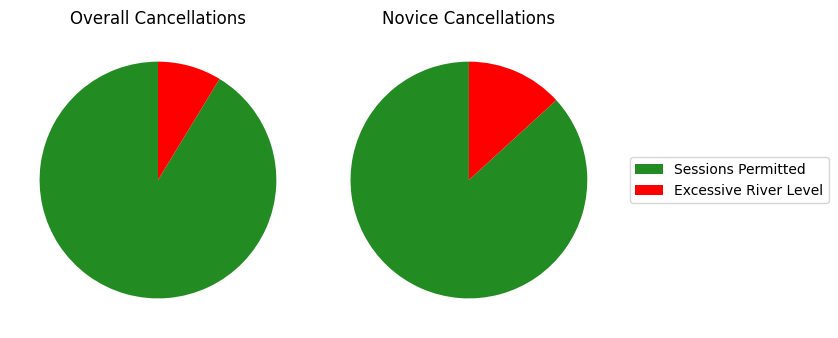

In [100]:
from matplotlib import pyplot as plt

#Finds overall probability of cancellation

# Counts numer of cancelled days and total days
max_days_recorded = 0
max_days_above_ovarall_limit = 0
max_days_above_novice_limit = 0
current_row = 0
for row in max_working_array:
  if max_working_array[current_row,1].astype(float) >= 0.96:
    max_days_above_ovarall_limit +=1
  if max_working_array[current_row,1].astype(float) >= 0.78:
    max_days_above_novice_limit +=1
  current_row+=1
  max_days_recorded+=1

# Counts number of non-cancelled days
max_days_below_ovarall_limit = max_days_recorded - max_days_above_ovarall_limit
max_days_below_novice_limit = max_days_recorded - max_days_above_novice_limit

# plots data
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(1,2,1)
plt.pie(x = [max_days_below_ovarall_limit,max_days_above_ovarall_limit], colors = ['forestgreen','red'],startangle= 90)
plt.title('Overall Cancellations')
plt.subplot(1,2,2)
plt.pie(x = [max_days_below_novice_limit,max_days_above_novice_limit], colors = ['forestgreen','red'], startangle= 90)
plt.title('Novice Cancellations')
plt.legend(labels = ['Sessions Permitted', 'Excessive River Level'],loc='center left',
    bbox_to_anchor=(1.02, 0.5))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

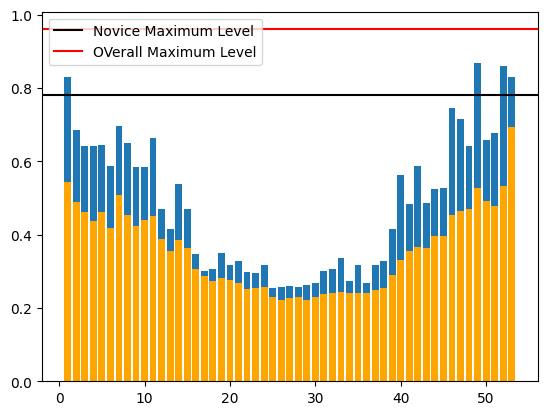

In [70]:
from matplotlib import pyplot as plt

#Plots weekly average minimums and maximums continuously for the weeks of the year
week_numbers = []
for i in range(53):
  week_numbers.append(i+1)
plt.bar( x= week_numbers, height = weekly_average_max)
plt.bar( x= week_numbers, height = weekly_average_min, color = 'orange')
plt.axhline(y= 0.78, xmin = 0, xmax = 1, label = 'Novice Maximum Level', color = 'black')
plt.axhline(y= 0.96, xmin = 0, xmax = 1, label = 'OVerall Maximum Level', color = 'red')
plt.legend()